## Lab 4, Problem 1

a) Use filenames.txt to load all CSV files into separate dataframes and store them in a dictionary
crypto that allows you to access the dataframes via the currencies’ short identifiers (ADA, BCH, ...).

In [4]:
import pandas as pd
from IPython.display import display, Markdown

# Read filenames.txt to get the list of CSV filenames
with open("/home/nnds3a/lab/lab_4/Crypto/filenames.txt", 'r') as f:
    filenames = f.read().splitlines()

# Read each CSV file into a dataframe and store in a dictionary
crypto = {}
for filename in filenames:
    crypto[filename] = pd.read_csv(f"/home/nnds3a/lab/lab_4/Crypto/{filename}")

# Display the content of all dataframes as markdown
# for currency, df in crypto.items():
#     display(Markdown(f"## {currency}"))
#     display(df.head())  # Shows the first 5 rows of the dataframe


b) Calculate the daily volatility for all cryptos as presented in the lecture notebook. Store your results
in whatever data structure floats your boat: A new dataframe, a dictionary of dataseries, a list of
dataseries, ...

In [5]:
# Dictionary to hold the volatility series for each crypto
volatility_dict = {}

for currency, df in crypto.items():
    # Calculate the daily returns as percentage change from the previous day
    vola = (df["High"]-df["Low"])/df["Open"]
    df['Daily_Return'] = vola.pct_change() * 100
    # Calculate the standard deviation of the daily returns
    volatility = df['Daily_Return'].std()
    # Store the volatility in the dictionary
    volatility_dict[currency] = volatility

# If you prefer to have the volatilities in a DataFrame:
volatility_df = pd.DataFrame(list(volatility_dict.items()), columns=['Currency', 'Volatility'])

# Display the results if desired
print(volatility_df)

       Currency  Volatility
0   ADA-USD.csv   87.119910
1   BCH-USD.csv  136.818782
2   BTC-USD.csv  134.365546
3   EOS-USD.csv  135.749166
4   ETH-USD.csv  109.762125
5  LINK-USD.csv   86.637453
6   LTC-USD.csv  173.360343
7  USDT-USD.csv         NaN
8   XRP-USD.csv         NaN
9   XTZ-USD.csv   89.601460


/home/nnds3a/miniconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/nnds3a/miniconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


c) Create a boxplot that shows the volatility of all ten currencies at a glance. How does the volatility of
the cryptomarket compare to the volatility of gold?

/tmp/ipykernel_12938/2838568907.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  gold_df['Daily_Return'] = vola.pct_change() * 100
/home/nnds3a/miniconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Figure size 1200x800 with 0 Axes>

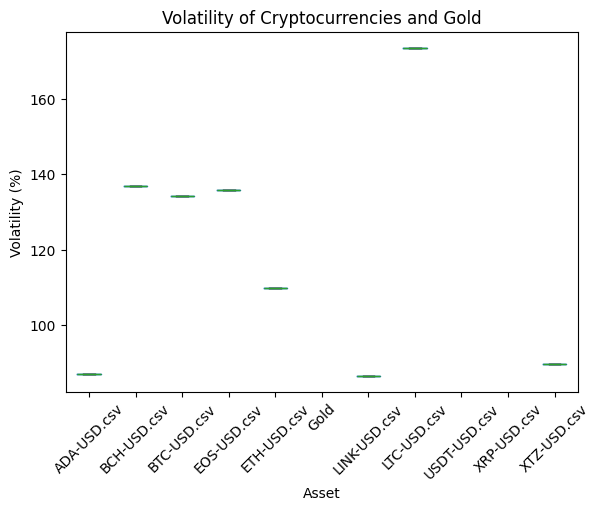

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the 'volatility_dict' dictionary is already populated with the cryptocurrencies' volatilities
# Read the gold CSV file into a dataframe
gold_df = pd.read_csv("/home/nnds3a/lab/lab_4/teamFiles/Gold.csv")

# Calculate the daily returns and volatility for gold
vola = (gold_df["High"]-gold_df["Low"])/gold_df["Open"]
gold_df['Daily_Return'] = vola.pct_change() * 100
gold_volatility = gold_df['Daily_Return'].std()

# Add gold volatility to the dictionary with the other cryptocurrencies
volatility_dict['Gold'] = gold_volatility

# Convert the dictionary to a DataFrame for plotting
volatility_df = pd.DataFrame(list(volatility_dict.items()), columns=['Currency', 'Volatility'])

# Plotting the boxplot
plt.figure(figsize=(12, 8))
# Since now we have a column with the names and one with the volatilities, we use 'Volatility' directly
volatility_df.boxplot(column=['Volatility'], by='Currency', grid=False)
plt.title('Volatility of Cryptocurrencies and Gold')
plt.suptitle('')  # Suppress the automatic title
plt.ylabel('Volatility (%)')
plt.xlabel('Asset')
plt.xticks(rotation=45)
plt.show()
